In [3]:
# 기본 패키지 준비
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터 준비
diabetes = pd.read_csv('data-files/diabetes.csv')

In [6]:
# 데이터 탐색
diabetes.info()
diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# 설명변수와 목적변수 구분
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values

In [9]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [22]:
500 / 768

0.6510416666666666

In [8]:
# 훈련세트와 테스트세트 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train.shape, y_train.shape

((576, 8), (576,))

In [11]:
# KNN 모델 훈련
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train) # 모델 훈련

KNeighborsClassifier(n_neighbors=3)

In [13]:
# 훈련된 모델을 사용해서 예측
predicted_y = knn.predict(X_test)

In [24]:
# 예측 정확도 계산
print( (y_test == predicted_y).sum() ) # 예측에 성공한 개수
print( (y_test == predicted_y).sum() / len(y_test) ) # 예측에 성공한 개수

134
0.6979166666666666


In [27]:
# 예측 정확도 계산 2
print( knn.score(X_train, y_train) ) # 훈련 데이터에 대한 예측 정확도
print( knn.score(X_test, y_test) ) # 테스트 데이터에 대한 예측 정확도

0.8576388888888888
0.6979166666666666


In [30]:
# 이웃 갯수를 변경하면서 훈련데이터와 테스트 데이터의 예측 정확도 산출
n_neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))

for idx, n in enumerate(n_neighbors): # 이웃 갯수를 변경하면서 반복
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy[idx] = knn.score(X_train, y_train)
    test_accuracy[idx] = knn.score(X_test, y_test)

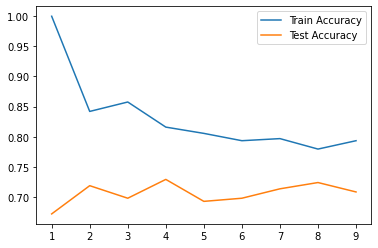

In [31]:
# 예측 정확도 시각화
plt.plot(n_neighbors, train_accuracy, label='Train Accuracy')
plt.plot(n_neighbors, test_accuracy, label='Test Accuracy')
plt.legend()
plt.show()

In [33]:
test_accuracy[3], test_accuracy[7]

(0.7291666666666666, 0.7239583333333334)

In [34]:
# 최적 모델 훈련
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [35]:
# 모델 평가
knn.score(X_test, y_test)

0.7291666666666666